In [1]:
# one-max
import random

# gene
def generate_01():
    return random.randint(0, 1)

# evaluate
def compute_fitness(vector):
    return sum(gen for gen in vector)

def create_vector():
    return [generate_01() for _ in range(n)]

def exchange(vector1, vector2, rate=0.9):
    vector1_new = vector1.copy()
    vector2_new = vector2.copy()
    
    for i in range(n):
        if random.random() < rate:
            vector1_new[i] = vector2[i]
            vector2_new[i] = vector1[i]            
    
    return vector1_new, vector2_new

def explore(vector, rate=0.05):
    vector_m = vector.copy()
    
    for i in range(n):
        if random.random() < rate:
            vector_m[i] = generate_01()
        
    return vector_m

# population is sorted according to fitness
def selection(sorted_vectors):    
    index1 = random.randint(0, m-1)  
    index2 = random.randint(0, m-1)
    
    while index2 == index1:
        index2 = random.randint(0, m-1)
    
    
    vector = sorted_vectors[index1]
    if index2 > index1:
        vector = sorted_vectors[index2]
    
    return vector

In [2]:
n = 20                 # size of individual (chromosome)
m = 50                 # size of population
n_generations = 20     # number of generations

# để vẽ biểu đồ quá trình tối ưu
fitnesses = []


# create population
vectors = [create_vector() for _ in range(m)]

# loops
for i in range(n_generations):
    # step 1: sort population
    sorted_vectors = sorted(vectors, key=compute_fitness)
        
    if i%1 == 0:
        fitnesses.append(compute_fitness(sorted_vectors[m-1]))
        print("BEST:", compute_fitness(sorted_vectors[m-1]))      
    
    new_vectors = []
    while len(new_vectors) < m:
        # step2: selection
        vector_s1 = selection(sorted_vectors)
        vector_s2 = selection(sorted_vectors) # duplication
        
        # step3: crossover
        vector_c1, vector_c2 = exchange(vector_s1, vector_s2)
        
        # step4: mutation
        vector_m1 = explore(vector_c1)
        vector_m2 = explore(vector_c2)
        
        new_vectors.append(vector_m1)
        new_vectors.append(vector_m2) 
        
    # update
    vectors = new_vectors

BEST: 15
BEST: 15
BEST: 17
BEST: 17
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 19
BEST: 19
BEST: 19
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20


In [3]:
sorted_vectors = sorted(vectors, key=compute_fitness)
vector_best = sorted_vectors[m-1]
print(vector_best)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


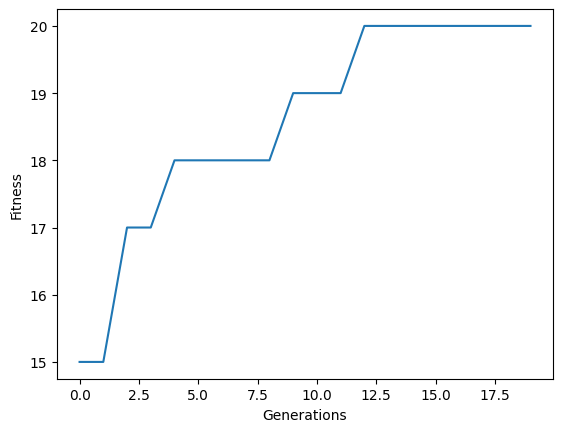

In [4]:
import matplotlib.pyplot as plt

plt.plot(fitnesses)
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()